In [1]:
import ROOT as R
R.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/00


In [3]:
import os
import math

In [12]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_09_15_tracker/reco/'
FILES_IN = [os.path.join(DIR_IN, name) for name in [
#     'pgun_mu_100_6ptBIB50percent_v1_Ct4TimeSplit_dbg_time_j1.root',
#     'pgun_mu_100_6ptBIB50percent_v1_Ct5TimeSplit_timing_j1.root',
    'pgun_mu_100_6ptBIB50percent_v2_Ct6TimeSplit_DL_allSeed_j1.root',
    'pgun_mu_100_6ptBIB50percent_v2_Ct6TimeSplit_DL_trimSeed_j1.root'
]]


### Getting the histograms

In [13]:
histos = {}
# hsteps = {'timing_buildNewTracks_seeding': [0, 1, 2],
#           'timing_buildNewTracks_extending': [0, 1, 2],
#           'timing_buildNewTracks_neighbourSearch': [0, 1, 2],
#           'timing_buildNewTracks_seed_total': [0, 1, 2],
#           'timing_extendTracks_extendTracksPerLayer': [3, 4],
#           'timing_extendTracks_extendTrack': [3, 4]
#          }
hsteps = {'timing_buildNewTracks': [0, 2, 4],
          'timing_extendTracks': [1, 3, 5],
          'timing_buildNewTracks_seeding': [0, 2, 4],
          'timing_buildNewTracks_extending': [0, 2, 4],
          'timing_buildNewTracks_neighbourSearch': [0, 2, 4],
          'timing_buildNewTracks_seed_total': [0, 2, 4],
          'timing_extendTracks_extendTracksPerLayer': [1, 3, 5],
          'timing_extendTracks_extendTrack': [1, 3, 5]
         }
for iF, file_in in enumerate(FILES_IN):
    hs = {}
    fIn = R.TFile(file_in)
    for name, steps in hsteps.items():
        for step in steps:
            hname = '{0:s}_{1:d}'.format(name, step)
            h = fIn.Get(hname).Clone()
            h.SetDirectory(0)
            R.SetOwnership(h, False)
            hs[(name, step)] = h
    histos[iF] = hs
    fIn.Close()

### Printing statistics

In [14]:
for hname, steps in hsteps.items():
    print(hname)
    for iF, t in enumerate(['6 all  ', '6 trim ']):
        print('  split {0:s}  mean:  '.format(t)+'\t'.join(['{0:.1e} x {1:.0f} = {2:.1e}s '.format(histos[iF][(hname, s)].GetMean(), histos[iF][(hname, s)].GetEntries(), histos[iF][(hname, s)].GetMean() * histos[iF][(hname, s)].GetEntries() / 1e3) for s in steps]))
        

timing_buildNewTracks
  split 6 all    mean:  1.6e+04 x 1 = 1.6e+01s 	0.0e+00 x 1 = 0.0e+00s 	2.0e+05 x 1 = 2.0e+02s 
  split 6 trim   mean:  3.8e+02 x 1 = 3.8e-01s 	0.0e+00 x 1 = 0.0e+00s 	1.2e+05 x 1 = 1.2e+02s 
timing_extendTracks
  split 6 all    mean:  2.7e+02 x 1 = 2.7e-01s 	5.6e+03 x 1 = 5.6e+00s 	1.4e+04 x 1 = 1.4e+01s 
  split 6 trim   mean:  2.6e+02 x 1 = 2.6e-01s 	5.9e+03 x 1 = 5.9e+00s 	1.3e+04 x 1 = 1.3e+01s 
timing_buildNewTracks_seeding
  split 6 all    mean:  4.2e-03 x 7101 = 3.0e-02s 	1.8e-02 x 176705 = 3.2e+00s 	1.5e-03 x 20525 = 3.0e-02s 
  split 6 trim   mean:  0.0e+00 x 898 = 0.0e+00s 	2.2e-02 x 146699 = 3.2e+00s 	1.6e-03 x 6379 = 1.0e-02s 
timing_buildNewTracks_extending
  split 6 all    mean:  2.2e+00 x 7065 = 1.6e+01s 	8.2e+01 x 166502 = 1.4e+04s 	9.9e+00 x 19412 = 1.9e+02s 
  split 6 trim   mean:  3.7e-01 x 895 = 3.3e-01s 	8.1e+01 x 145383 = 1.2e+04s 	1.8e+01 x 6178 = 1.1e+02s 
timing_buildNewTracks_neighbourSearch
  split 6 all    mean:  4.3e-02 x 7206 = 3.1e-

## Checking conformal search criteria

In [222]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_09_15_tracker/reco/'
FILES_IN = {j: os.path.join(DIR_IN, 'pgun_mu_1per10k_6ptFalse_v2_Ct6TimeSplit_allSeed_looser_j{0:d}.root'.format(j)) for j in [2]}


### Getting the histograms

In [225]:
names = ['cell_angle', 'cell_angleRZ', 'cell_slopeZ', 'cell_length', 'track_nClusters', 'track_chi2', 'track_chi2ZS']
steps = range(7)
histos = {}
for iJ, file_in in FILES_IN.items():
    hs = {}
    fIn = R.TFile(file_in)
#     fIn.cd('Ct6TimeSplit_allSeed_loose')
    for name in names:
        for step in steps:
            hname = 'search_{0:s}_{1:d}'.format(name, step)
            h = R.gDirectory.Get(hname).Clone()
            h.SetDirectory(0)
            R.SetOwnership(h, False)
            hs[(name, step)] = h
    histos[iJ] = hs
    fIn.Close()

### Drawing the histograms

In [226]:
JOB = 2
hs = {}
for name in names:
    h_prev = None
    hs[name] = []
    for step in steps:
        h = histos[JOB][(name, step)].Clone()
        h.SetDirectory(0)
        R.SetOwnership(h, False)
        if h_prev is not None and 'cell_' in name:
#             print(name, step, h.Integral(), h_prev.Integral())
            h.Add(h_prev, -1)
        hs[name].append(h)
        h_prev = h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cell_angle
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cell_angleRZ
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cell_slopeZ
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cell_length
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_track_chi2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_track_chi2ZS
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_track_nClusters


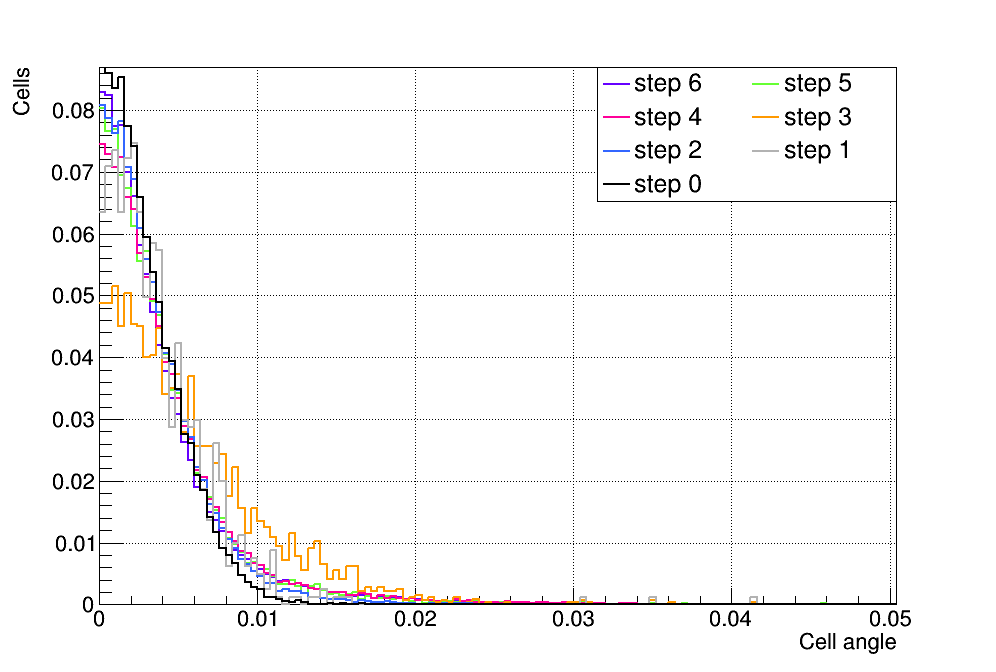

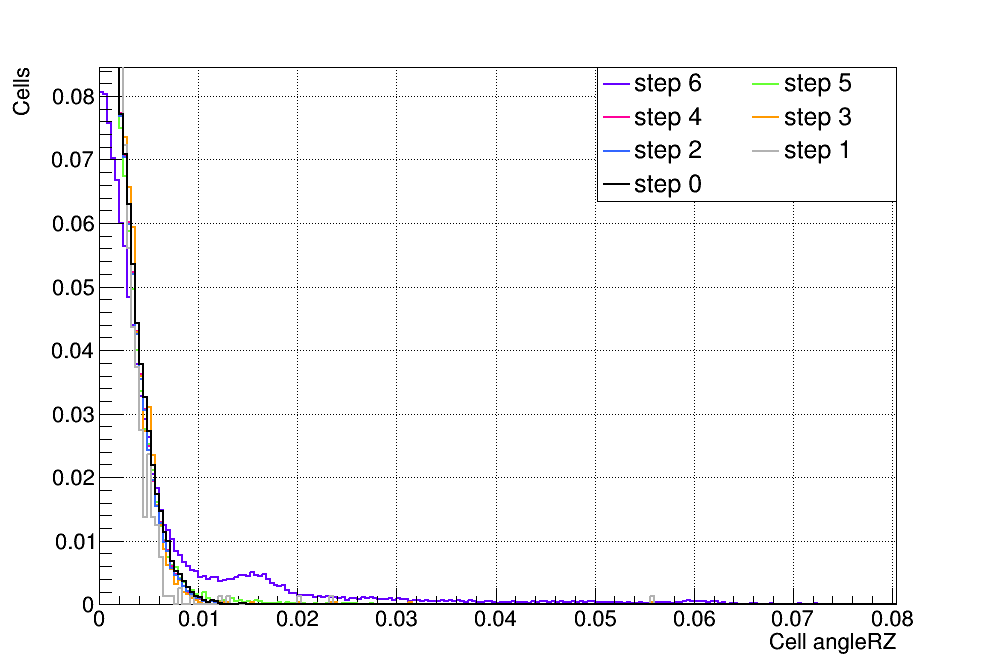

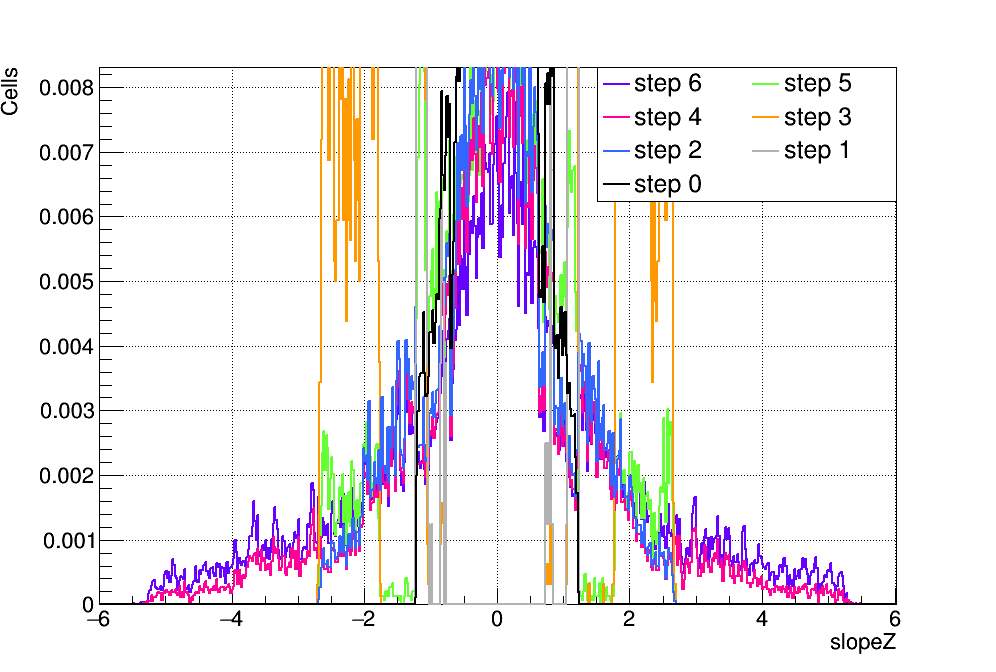

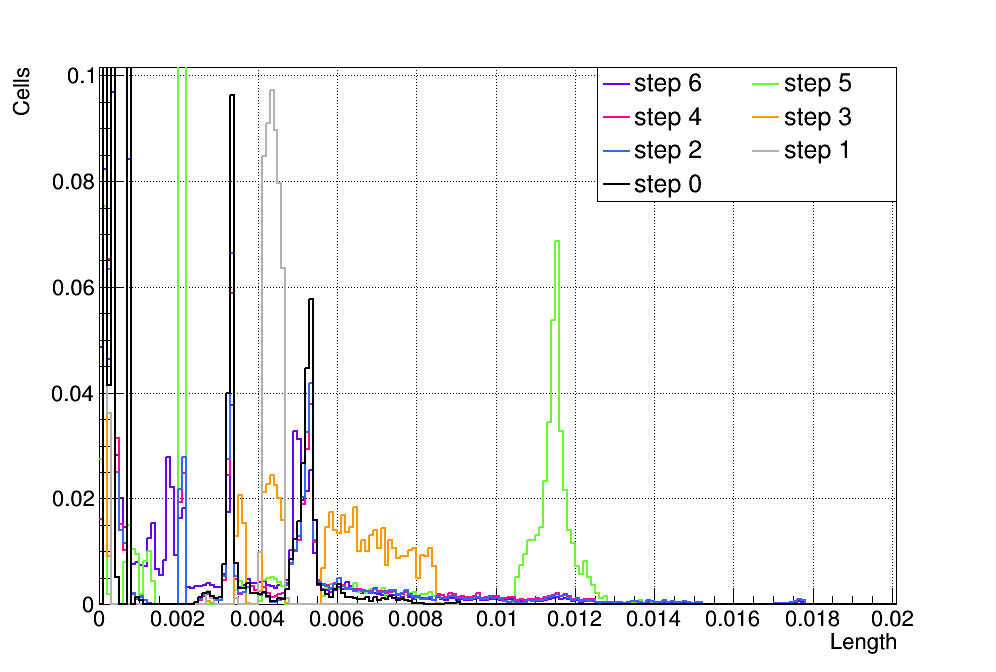

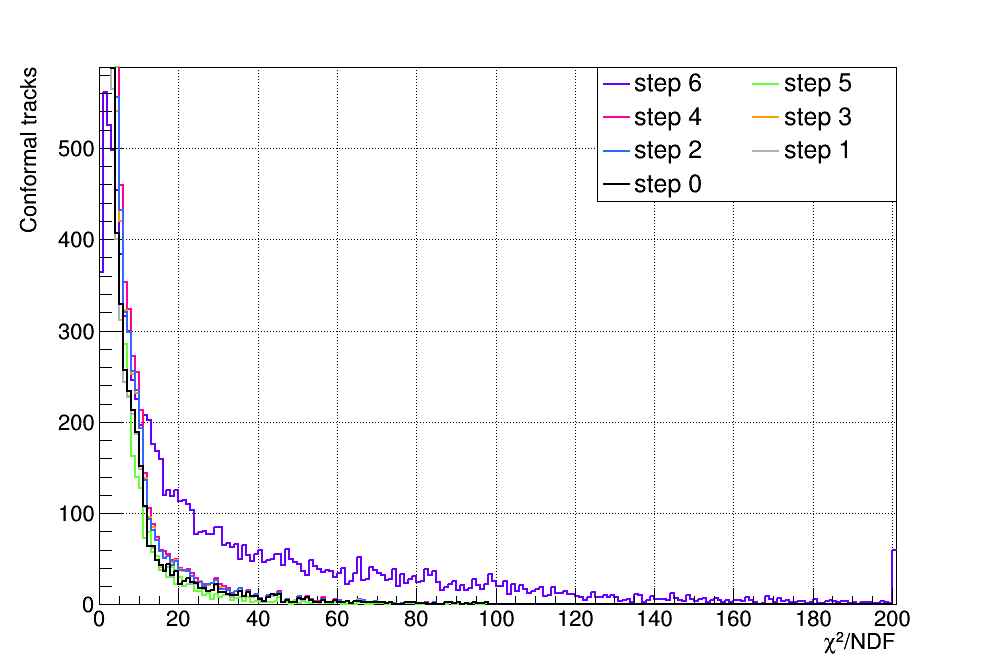

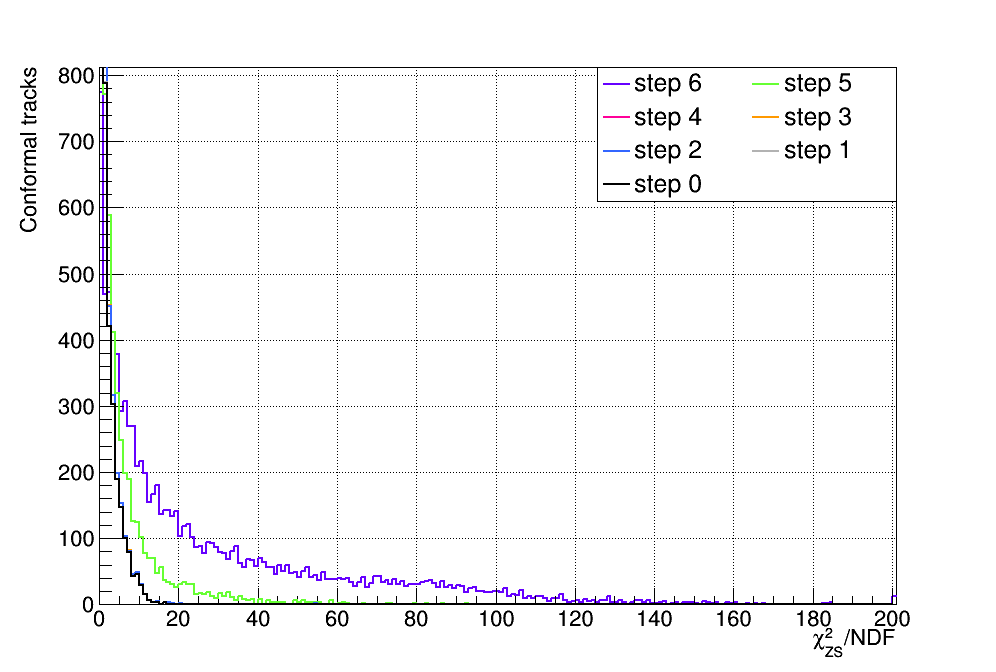

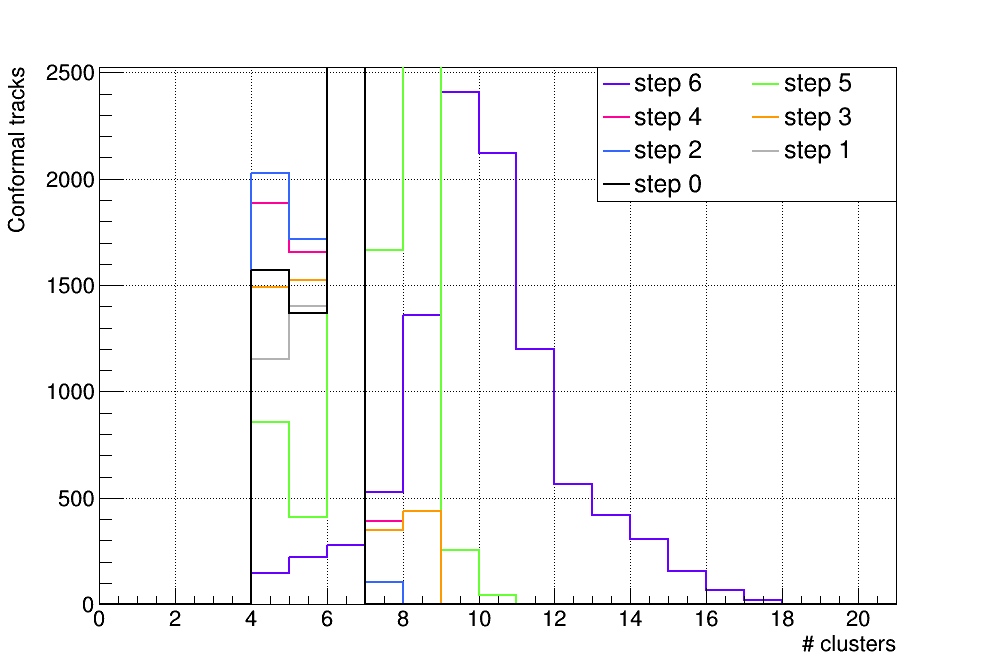

In [228]:
OUT_DIR = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_09_15_tracker/plots/'
colors = [1, 16, R.kAzure-2, R.kOrange-3, R.kPink+7, R.kSpring-2, R.kViolet+7]
confs = {
    'cell_angle': {'x': (0, 0.05), 'rebin': 4},
    'cell_angleRZ': {'x': (0, 0.08), 'rebin': 4},
    'cell_slopeZ': {'x': (-6, 6), 'rebin': 1},
    'cell_length': {'x': (0, 0.02), 'rebin': 1},
    'track_chi2': {'x': (0, 200), 'rebin': 10},
    'track_chi2ZS': {'x': (0, 200), 'rebin': 10},
    'track_nClusters': {'x': (0, 20), 'rebin': 1},
}
for name, conf in confs.items():
    C = R.TCanvas('c_{0:s}'.format(name), '', 1000, 700)
    R.SetOwnership(C, False)
    leg = R.TLegend(0.6,0.7, 0.9,0.9)
    leg.SetNColumns(2)
    R.SetOwnership(leg, False)
    C.SetGrid(1,1)
#     C.SetLogy()
    hIds = range(len(hs[name])-1, 0-1, -1)
    for iH, hId in enumerate(hIds):
        h = hs[name][hId].Clone()
        h.SetDirectory(0)
        R.SetOwnership(h, False)
        if 'cell_' in name:
#             if h.Integral() > 0:
            h.Scale(1.0/h.Integral())
#             else:
#                 h.Scale(0)
        drawopt = 'HIST'
        if iH > 0:
            drawopt += ' same'
        conf = confs[name]
        if 'rebin' in conf:
            h.Rebin(conf['rebin'])
        if iH == 0 and 'x' in conf:
            h.SetAxisRange(conf['x'][0], conf['x'][1], 'X')
        h.SetLineColor(colors[hId])
        h.SetLineWidth(2)
        leg.AddEntry(h, 'step {0:d}'.format(hId), 'L')
        h.Draw(drawopt)
    leg.Draw()
#     C.SaveAs(os.path.join(OUT_DIR, '{0:s}_j{1:d}_DL.png'.format(name, JOB)))
    C.Draw()

In [112]:
hs['chi2'][6].GetEntries()

9715.0